In [1]:
import sys

In [ ]:
cd '/srv/share3/hagrawal9/project/habitat/habitat-api/'

In [ ]:
import gzip
import json
import os
import sys
from typing import Any, Dict, List, Optional, Type

import attr
import cv2
import git
import magnum as mn
import numpy as np

# %matplotlib inline
from matplotlib import pyplot as plt
from pathlib import Path
from PIL import Image


import habitat
import habitat_sim
from habitat.core.registry import registry
from habitat_sim.utils import viz_utils as vut
from habitat.utils.visualizations import maps
from habitat.utils.visualizations.utils import observations_to_image

In [ ]:
from habitat.datasets.rearrangement.rearrangement_dataset import RearrangementDatasetV0
from habitat.tasks.rearrangement.rearrangement_task import RearrangementEpisode
from rearrangement.task.environment import RearrangementRLEnv

In [5]:
from rearrangement.task.sensors import *

In [6]:
from habitat_baselines.config.default import get_config

In [7]:
def print_info(obs, reward, info):
    obj_id = info['current_obj_id_navmesh']
    a2o_dist = info['agent_to_object_distance'][obj_id]
    o2g_dist = info['object_to_goal_distance'][obj_id]
    opg = obs['all_object_positions'][obj_id]
    gpg = obs['all_object_goals'][obj_id]
    opg_angle = np.rad2deg(obs['all_object_positions'][0][1])
    gpg_angle = np.rad2deg(obs['all_object_goals'][0][1])
    
    print("Reward: {}, ObjId: {}, A2O Dist: {}, O2G Dist: {} Object: {} Goal: {} Gripped ObjID: {}".format(sum(reward.values()), obj_id, a2o_dist, o2g_dist, (opg[0], opg_angle), (gpg[0], gpg_angle), obs['gripped_object_id']))

In [8]:
config = get_config("rearrangement/configs/rearrangement.yaml")

In [9]:
config.defrost()
config.TASK_CONFIG.defrost()
config.TASK_CONFIG.TASK.MEASUREMENTS = ['OBJECT_TO_GOAL_DISTANCE', 'AGENT_TO_OBJECT_DISTANCE', 'TOP_DOWN_MAP']
config.TASK_CONFIG.freeze()
config.freeze()

In [10]:
registry.mapping['sensor']

{'HabitatSimRGBSensor': habitat.sims.habitat_simulator.habitat_simulator.HabitatSimRGBSensor,
 'HabitatSimDepthSensor': habitat.sims.habitat_simulator.habitat_simulator.HabitatSimDepthSensor,
 'HabitatSimSemanticSensor': habitat.sims.habitat_simulator.habitat_simulator.HabitatSimSemanticSensor,
 'PointGoalSensor': habitat.tasks.nav.nav.PointGoalSensor,
 'ImageGoalSensor': habitat.tasks.nav.nav.ImageGoalSensor,
 'PointGoalWithGPSCompassSensor': habitat.tasks.nav.nav.IntegratedPointGoalGPSAndCompassSensor,
 'HeadingSensor': habitat.tasks.nav.nav.HeadingSensor,
 'CompassSensor': habitat.tasks.nav.nav.EpisodicCompassSensor,
 'GPSSensor': habitat.tasks.nav.nav.EpisodicGPSSensor,
 'ProximitySensor': habitat.tasks.nav.nav.ProximitySensor,
 'QuestionSensor': habitat.tasks.eqa.eqa.QuestionSensor,
 'InstructionSensor': habitat.tasks.vln.vln.InstructionSensor,
 'GrippedObjectSensor': habitat.tasks.rearrangement.rearrangement_task.GrippedObjectSensor,
 'AllObjectPositions': habitat.tasks.rearrange

In [11]:
try:
    env.close()
except:
    pass
env = RearrangementRLEnv(config)

2020-10-22 20:54:07,542 Initializing dataset RearrangementDataset-v0
2020-10-22 20:54:07,768 initializing sim RearrangementSim-v0
I1022 20:54:24.495785 12292 simulator.py:168] Loaded navmesh data/scene_datasets/gibson_train_val/Sands.navmesh
I1022 20:54:24.501435 12292 simulator.py:180] Recomputing navmesh for agent's height 0.88 and radius 0.18.
2020-10-22 20:54:24,807 Initializing task RearrangementTask-v0


In [12]:
config.TASK_CONFIG.TASK.SENSORS

['GRIPPED_OBJECT_SENSOR',
 'ALL_OBJECT_POSITIONS',
 'ALL_OBJECT_GOALS',
 'ORACLE_NEXT_OBJECT_SENSOR',
 'RANDOM_OBJECT_SENSOR',
 'CLOSEST_OBJECT_SENSOR',
 'L2DIST_OBJECT_SENSOR']

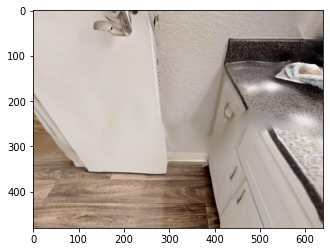

In [13]:
obs = env.reset()
obs_list = []
plt.imshow(obs['rgb'])

Reward: 0.22234037518501282, ObjId: 3, A2O Dist: 0.38072851300239563, O2G Dist: 3.719473361968994 Object: (0.38072851300239563, 114.9133428983423) Goal: (3.9807522296905518, 45.96194460437617) Gripped ObjID: -1


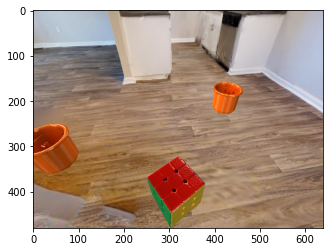

In [39]:
obs, reward, done, info = env.step(action={'action':1})
plt.imshow(obs['rgb'])
print_info(obs, reward, info)

Reward: 0.0, ObjId: 3, A2O Dist: 2.2857837677001953, O2G Dist: 3.719473361968994 Object: (1.9957759380340576, 8.604483632406241) Goal: (5.708003997802734, -42.14295361299026) Gripped ObjID: -1


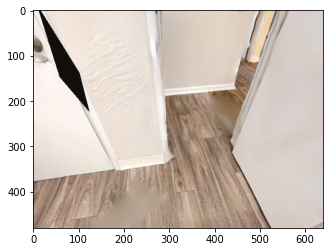

In [21]:
obs, reward, done, info = env.step(action={'action':2})
plt.imshow(obs['rgb'])
print_info(obs, reward, info)

Reward: 0.0, ObjId: 3, A2O Dist: 1.103066325187683, O2G Dist: 3.719473361968994 Object: (1.103066325187683, 105.85099326605601) Goal: (4.500639915466309, 40.442352622872974) Gripped ObjID: -1


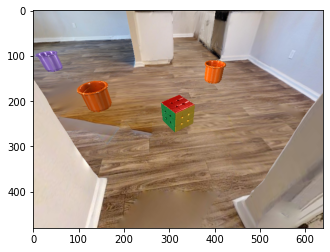

In [36]:
obs, reward, done, info = env.step(action={'action':3})
plt.imshow(obs['rgb'])
print_info(obs, reward, info)

Reward: 2.4, ObjId: 3, A2O Dist: 0.0, O2G Dist: inf Object: (0.0, 114.9133428983423) Goal: (3.9807522296905518, 45.96194460437617) Gripped ObjID: 3


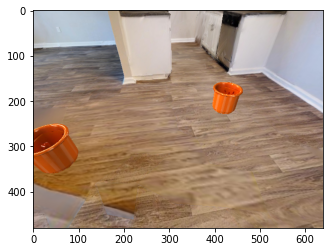

In [40]:
obs, reward, done, info = env.step(action={'action':4})
plt.imshow(obs['rgb'])
print_info(obs, reward, info)

In [102]:
obs['gripped_object_id']

3